<a href="https://colab.research.google.com/github/pri538/Deep-Learning-Project/blob/main/Google_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

In [ ]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []

for i in range(6, 1258):
    X_train.append(training_set_scaled[i-6:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [ ]:
dataset_train.shape

(1258, 6)

In [ ]:
X_train = np.array(X_train)
y_train=np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

print(regressor.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 6, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 6, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 6, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 6, 50)             20200     
                                                                 
 dropout_2 (Dropout)         (None, 6, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
40/40 [==============================] - 8s 16ms/step - loss: 0.0976
Epoch 2/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0097
Epoch 3/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0053
Epoch 4/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0050
Epoch 5/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0041
Epoch 6/100
40/40 [==============================] - 1s 22ms/step - loss: 0.0039
Epoch 7/100
40/40 [==============================] - 1s 23ms/step - loss: 0.0040
Epoch 8/100
40/40 [==============================] - 1s 24ms/step - loss: 0.0037
Epoch 9/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0040
Epoch 10/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0034
Epoch 11/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0041
Epoch 12/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0036
Epoch 13/100
40/40 [=====

In [ ]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
# real_stock_price = dataset_test.iloc[:, 1:2].values

(20, 6)

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(6, 20):
    X_test.append(inputs[i-6:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


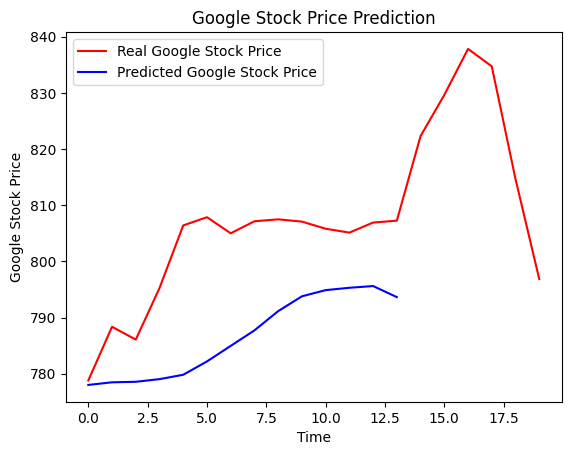

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()